In [2]:
import pandas as pd
import math
import seaborn as sns
import numpy as np

In [3]:
movements = pd.read_csv("../data/data_movements_demo.csv")
records = pd.read_csv("../data/data_trials_demo.csv")

<Axes: xlabel='x', ylabel='y'>

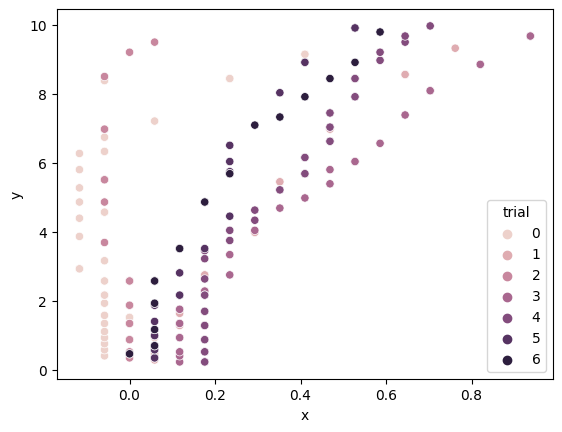

In [4]:
sns.scatterplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial')

In [5]:
movements

,Unnamed: 0,trial,state,sample,time,x,y
0,0,0,search_ring,0,0.001732,12.597656,0.996094
1,1,0,search_ring,1,0.003586,12.597656,0.996094
2,2,0,search_ring,2,0.007032,12.597656,0.996094
3,3,0,search_ring,3,0.021153,12.597656,0.996094
4,4,0,search_ring,4,0.029664,12.597656,0.996094
...,...,...,...,...,...,...,...
4544,657,6,iti,4062,35.599754,1.347656,15.996094
4545,658,6,iti,4063,35.603021,1.347656,15.996094
4546,659,6,iti,4064,35.617736,1.347656,15.996094
4547,660,6,iti,4065,35.624573,1.347656,15.996094


In [6]:
dist = lambda x1, y1, x2, y2: math.sqrt((y2 - y1)**2 + (x2 - x1)**2)

dx = [0]
dt = [0]
for i in range(1, len(movements)):
    prev_row = movements.iloc[i - 1]
    cur_row = movements.iloc[i]
    dx.append(dist(prev_row.x, prev_row.y, cur_row.x, cur_row.y))
    dt.append(cur_row.time - prev_row.time)

movements['dx'] = dx
movements['dt'] = dt

In [7]:
movements['vel'] = movements.dx / movements.dt

In [8]:
reach = movements.loc[movements.state == 'reach']
max_vel = reach[['trial', 'dx', 'dt', 'vel']].groupby('trial').agg({'vel': 'max'}).reset_index().rename(columns={'vel': 'max_vel'})

joined = pd.merge(reach, max_vel, on='trial', how='left')
mx_points = joined.loc[joined.vel == joined.max_vel]
first_points = reach.groupby('trial').agg(lambda x: list(x)[0]).reset_index()

In [9]:
mx_points

,Unnamed: 0,trial,state,sample,time,x,y,dx,dt,vel,max_vel
9,695,0,reach,695,5.884274,-0.058594,3.164062,0.585938,0.002780,210.800505,210.800505
54,217,1,reach,716,6.159732,0.761719,9.316406,0.770680,0.004542,169.673986,169.673986
72,235,2,reach,1174,10.262327,0.000000,9.199219,0.705562,0.002972,237.433116,237.433116
92,189,3,reach,1592,13.956077,0.527344,6.035156,0.241588,0.001646,146.761771,146.761771
118,258,4,reach,2084,18.362502,0.234375,4.042969,0.292969,0.003111,94.168106,94.168106
158,404,5,reach,3174,27.943981,0.351562,8.027344,1.527938,0.003479,439.209949,439.209949
184,424,6,reach,3829,33.611925,0.585938,9.785156,0.880857,0.002727,323.013278,323.013278


In [10]:
first_points

,trial,Unnamed: 0,state,sample,time,x,y,dx,dt,vel
0,0,686,reach,686,5.816161,-0.058594,0.410156,0.175781,0.014079,12.485202
1,1,201,reach,700,6.035644,0.058594,0.292969,0.292969,0.017518,16.723631
2,2,218,reach,1157,10.118683,0.000000,0.351562,0.175781,0.014745,11.921179
3,3,171,reach,1574,13.772280,0.117188,0.234375,0.058594,0.003916,14.964247
4,4,242,reach,2068,18.226785,0.175781,0.234375,0.117188,0.013656,8.581105
5,5,388,reach,3158,27.776884,0.058594,0.351562,0.234375,0.013768,17.022809
6,6,403,reach,3808,33.444158,0.000000,0.468750,0.234375,0.015272,15.346504


<Axes: xlabel='x', ylabel='y'>

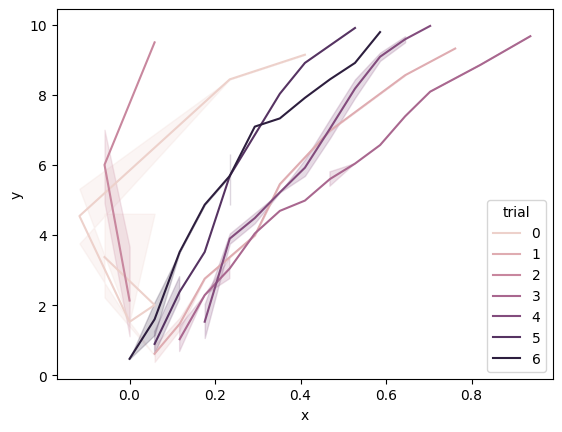

In [11]:
sns.lineplot(data = movements.loc[movements.state == 'reach'], x = 'x', y = 'y', hue = 'trial', sort = False)

In [12]:
movements = pd.read_csv('../data/data_movements_7.csv')
trials = pd.read_csv('../data/data_trials_7.csv')
trials['trial'] = trials.trial - 1

In [13]:
uncertainty_cols = ['no_uncertainty', 'low_uncertainty', 'high_uncertainty', 'unlimited_uncertainty']
def uncertainty_label(x):
    if all(x[col] == 0 for col in uncertainty_cols):
        return 'w/b'
    for col in uncertainty_cols:
        if x[col] == 1:
            return col

trials['uncertainty'] = trials.apply(uncertainty_label, axis=1)

<Axes: xlabel='x', ylabel='y'>

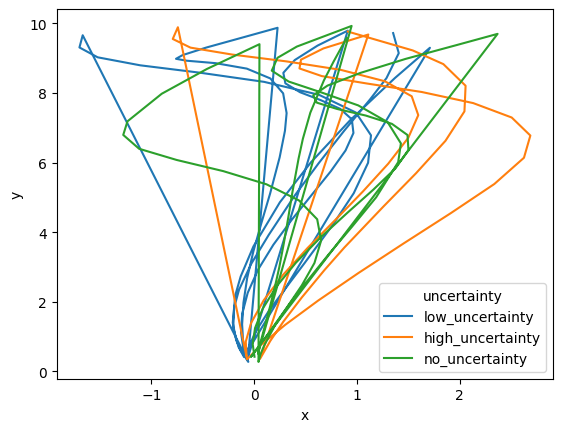

In [14]:
joined = pd.merge(movements, trials[['trial', 'uncertainty']], on='trial', how='left')

rand_trials = np.random.choice([i for i in range(110, 180)], 20)

# smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials))]

smpl = joined.loc[(joined.state == 'reach') & (joined.trial.isin(rand_trials) & (joined.uncertainty.isin(['low_uncertainty', 'high_uncertainty', 'no_uncertainty'])))]

sns.lineplot(data = smpl.loc[smpl.state == 'reach'], x = 'x', y = 'y', hue = 'uncertainty', sort = False)


Checking for correct recording of movements post changes to exp. run code

In [19]:
test = pd.read_csv('../data/data_movements_demo.csv')
test.loc[test.trial ==6]

,Unnamed: 0,trial,state,sample,time,x,y
3887,0,6,search_ring,3405,30.011593,0.000000,11.660156
3888,1,6,search_ring,3406,30.026200,-0.058594,11.308594
3889,2,6,search_ring,3407,30.043202,-0.117188,10.898438
3890,3,6,search_ring,3408,30.045732,-0.117188,10.898438
3891,4,6,search_ring,3409,30.059279,-0.175781,10.605469
...,...,...,...,...,...,...,...
4544,657,6,iti,4062,35.599754,1.347656,15.996094
4545,658,6,iti,4063,35.603021,1.347656,15.996094
4546,659,6,iti,4064,35.617736,1.347656,15.996094
4547,660,6,iti,4065,35.624573,1.347656,15.996094
